In [1]:
#Importations for datasets
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.EMNIST(
    root="data",
    split='digits',
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.EMNIST(
    root="data",
    split='digits',
    train=False,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/561753746 [00:00<?, ?it/s]

Extracting data/EMNIST/raw/gzip.zip to data/EMNIST/raw


In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

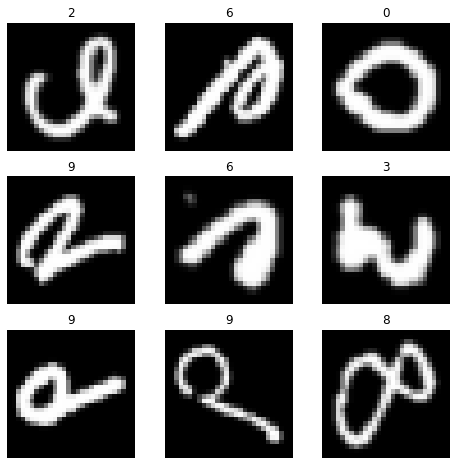

In [5]:
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [6]:
#Importations for Custom Dataset
import torch
from torchvision import transforms as T
import numpy as np

In [7]:
class CustomImageDataset(Dataset):
    def __init__(self, data):
        self.data = data
        #print(self.data[0])
        self.transform = T.Compose([T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]
        #print(image)
        #image = torch.cat([image, image, image], axis=0)
        image = self.transform(image) 
        return image

In [8]:
#training_dataset = CustomImageDataset(training_data)
#training_dataset.__class_getitem__(training_dataset[2])
#training_dataset = training_data
#print(training_dataset[0])

#training_dataset = CustomImageDataset(training_data)
#print(training_dataset.__len__())
#for i in np.arange(training_dataset.__len__()):
 # training_dataset.data[i] = training_dataset.__getitem__(i)
#print(training_dataset[0])

In [9]:
#Importations for Data Loader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
#for t in train_dataloader:
 # print(t.size())
#train_dataloader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


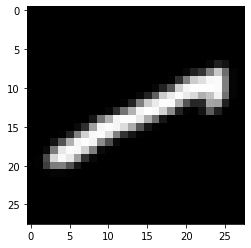

Label: 1


64

In [10]:
#Iteration 0 Testing

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")
len(train_features)

In [11]:
import torch.nn as nn
import torch.nn.functional as F

# PyTorch models inherit from torch.nn.Module
class GarmentClassifier(nn.Module):
    def __init__(self):
        super(GarmentClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 60, 2, stride=1)
        self.conv2 = nn.Conv2d(60, 120, 2, stride=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(120, 120, 2, stride=1)
        self.conv4 = nn.Conv2d(120, 120, 2, stride=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5, 120*24)
        self.fc2 = nn.Linear(120*24, 84)
        self.fc3 = nn.Linear(84, 64)
        self.out = nn.Linear(64, 10)

    def forward(self, x):
        #print(x.shape) 
        #x = self.pool(F.relu(self.conv1(x)))
        x = F.relu(self.conv1(x))
        #print(x.shape)
        #x = x.view(-1, 240)
        
        x = F.relu(self.conv2(x))
       # print(x.shape)
        x = self.pool(x)
        #print(x.shape)

        x = F.relu(self.conv3(x))
       # print(x.shape)
        x = F.relu(self.conv4(x))
        #x = x.view(-1, 1, 240)
        #print(x.shape)
        x = self.pool2(x)
        #print(x.shape)

        #x = x.view(-1, 1, 240)
        #print(x.shape)

        x = F.relu(self.fc1(x))
        #print(x.shape)
        x = F.relu(self.fc2(x))
        #print(x.shape)
        x = self.fc3(x)
        #print(x.shape)
        x = x.view(-1, 64)
        #print(x.shape)
        output = self.out(x)
        output=F.relu(x)
        output = output.view(64, 600)
        #print(output.shape)
        return output


model = GarmentClassifier()
print(model)
#model.forward(training_data)

GarmentClassifier(
  (conv1): Conv2d(1, 60, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(60, 120, kernel_size=(2, 2), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(120, 120, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(120, 120, kernel_size=(2, 2), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=5, out_features=2880, bias=True)
  (fc2): Linear(in_features=2880, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)


In [12]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [16]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(training_data, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #print(labels)
        #inputs = inputs.to(device)
        #train_labels = train_labels.to(device)

        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = model(inputs)
        print(outputs.shape)
        loss = loss_fn(outputs, train_labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

AttributeError: ignored

In [ ]:
# Initializing in a separate cell so we can easily add more epochs to the same run
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number, writer)

    # We don't need gradients on to do reporting
    model.train(False)

    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

In [ ]:
loss_fun = torch.nn.CrossEntropyLoss()

# NB: Loss functions expect data in batches, so we're creating batches of 4
# Represents the model's confidence in each of the 10 classes for a given input
dummy_outputs = torch.rand(4, 10)
# Represents the correct class among the 10 being tested
dummy_labels = torch.tensor([1, 5, 3, 7])

print(dummy_outputs)
print(dummy_outputs.size())
print(dummy_labels)
print(dummy_labels.size())

loss = loss_fun(dummy_outputs, dummy_labels)
print('Total loss for this batch: {}'.format(loss.item()))